Initial analysis of the annotated data

In [36]:
import matplotlib.pyplot as plt
import os 
import pandas as pd


DATA_PATH = os.path.join(os.getcwd(), "..", "data")

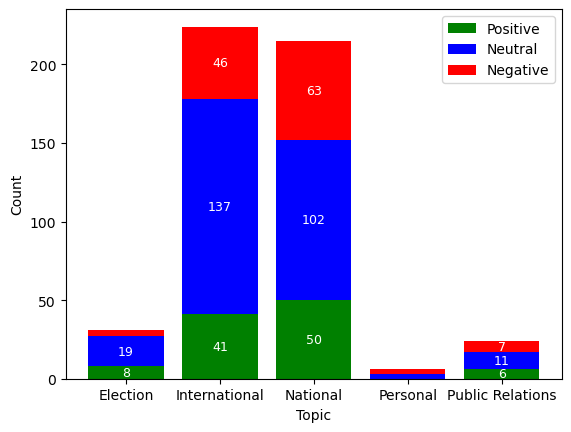

In [37]:
df = pd.read_csv(os.path.join(DATA_PATH, "articles", "final_annotated_articles.tsv"), sep="\t", index_col=0)

topics = df['open_coding_topic'].unique()
topics.sort()
count_pos = []
count_neutral = []
count_neg = []
for topic in topics:
    count_pos.append(len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Positive")]))
    count_neutral.append(len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Neutral")]))
    count_neg.append(len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Negative")]))

bar1 = plt.bar(topics, count_pos, label='Positive', color="green")
bar2 = plt.bar(topics, count_neutral, bottom=count_pos, label='Neutral', color="blue")
bar3 = plt.bar(topics, count_neg, bottom=[i+j for i, j in zip(count_pos, count_neutral)], label='Negative', color="red")

for bar in [bar1, bar2, bar3]:
    for sub_bar in bar.patches:
        height = sub_bar.get_height()
        if height == 0:
            continue
        x = sub_bar.get_x() + sub_bar.get_width() / 2
        if height > 5:
            # Label inside
            y = sub_bar.get_y() + height / 2
            plt.text(x, y, str(int(height)), ha='center', va='center', fontsize=9, color='white')

plt.xlabel("Topic")
plt.ylabel("Count")
plt.legend()
plt.show()

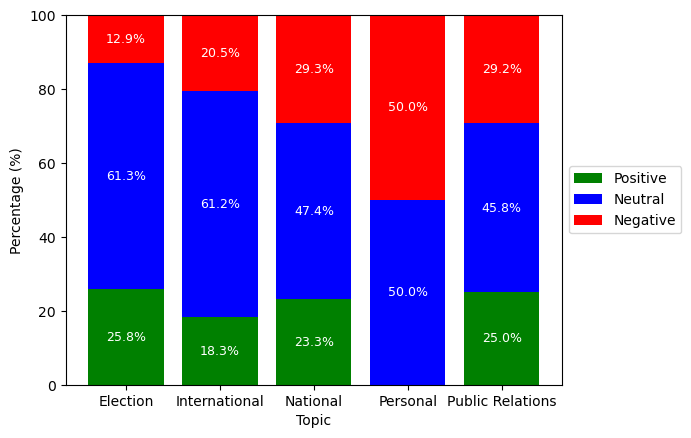

In [38]:
df = pd.read_csv(os.path.join(DATA_PATH, "articles", "final_annotated_articles.tsv"), sep="\t")

topics = df['open_coding_topic'].unique()
topics.sort()

count_pos = []
count_neutral = []
count_neg = []

for topic in topics:
    pos = len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Positive")])
    neu = len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Neutral")])
    neg = len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Negative")])

    total = pos + neu + neg

    # Normalize to percentage
    count_pos.append(pos / total * 100)
    count_neutral.append(neu / total * 100)
    count_neg.append(neg / total * 100)

# Plot normalized stacked bars
bar1 = plt.bar(topics, count_pos, label='Positive', color='green')
bar2 = plt.bar(topics, count_neutral, bottom=count_pos, label='Neutral', color='blue')
bar3 = plt.bar(topics, count_neg, bottom=[i+j for i,j in zip(count_pos, count_neutral)], 
               label='Negative', color='red')

# Add labels to each segment
for bar in [bar1, bar2, bar3]:
    for sub_bar in bar.patches:
        height = sub_bar.get_height()
        if height == 0:
            continue
        x = sub_bar.get_x() + sub_bar.get_width() / 2
        y = sub_bar.get_y() + height / 2
        plt.text(x, y, f"{height:.1f}%", ha='center', va='center', fontsize=9, color='white')

plt.xlabel("Topic")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


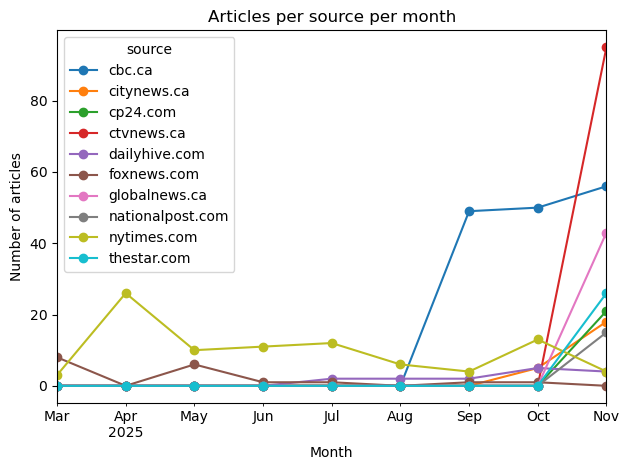

source,cbc.ca,citynews.ca,cp24.com,ctvnews.ca,dailyhive.com,foxnews.com,globalnews.ca,nationalpost.com,nytimes.com,thestar.com,Total
month,,,,,,,,,,,
2025-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,3.0,0.0,11.0
2025-04-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,26.0
2025-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,10.0,0.0,16.0
2025-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,0.0,12.0
2025-07-01 00:00:00,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,12.0,0.0,15.0
2025-08-01 00:00:00,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,0.0,8.0
2025-09-01 00:00:00,49.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0,0.0,56.0
2025-10-01 00:00:00,50.0,5.0,0.0,0.0,5.0,1.0,0.0,0.0,13.0,0.0,74.0
2025-11-01 00:00:00,56.0,18.0,21.0,95.0,4.0,0.0,43.0,15.0,4.0,26.0,282.0


In [40]:

df["date_clean"] = df["date"].str.slice(0, 10)

dt = pd.to_datetime(df["date_clean"], format="%Y-%m-%d", errors="coerce")

df["month"] = dt[~dt.isna()].dt.to_period("M").dt.to_timestamp()

counts = (
    df.groupby(["month", "source"])
      .size()
      .reset_index(name="count")
      .sort_values("month")
)

pivot = counts.pivot(index="month", columns="source", values="count").fillna(0)

ax = pivot.plot(marker="o")
ax.set_xlabel("Month")
ax.set_ylabel("Number of articles")
ax.set_title("Articles per source per month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

pivot_with_totals = pivot.copy()
pivot_with_totals["Total"] = pivot_with_totals.sum(axis=1)
pivot_with_totals.loc["Total"] = pivot_with_totals.sum(axis=0)
pivot_with_totals